In [8]:
import pandas as pd #đọc dữ liệu
import numpy as np #xử lý dữ liệu
import matplotlib.pyplot as plt #vẽ biểu đồ
from sklearn.preprocessing import MinMaxScaler #chuẩn hóa dữ liệu
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất,lấy ra giá trị tốt nhất
from keras.models import load_model #tải mô hình
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM



In [9]:
df_FPT=pd.read_csv("FPT.csv")




In [10]:
df_FPT
#Open Giá cổ phiếu khi thị trường mở cửa
# Close giá cổ phiểu khi thị trường đóng cửa
# Volumne số lượng cổ phiếu đã chuyển đổi tay giữa các nhà đầu tư
# Open Interest Số lượng cổ phiếu đang được mở cửa tại thời điểm đó

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0
...,...,...,...,...,...,...,...,...
97401,FPT,12/22/2020 14:24,58.20,58.20,58.20,58.20,27470,0
97402,FPT,12/22/2020 14:25,58.20,58.20,58.20,58.20,14820,0
97403,FPT,12/22/2020 14:26,58.20,58.20,58.20,58.20,500,0
97404,FPT,12/22/2020 14:29,58.10,58.10,58.10,58.10,2500,0


In [810]:
df_FPT['Date/Time'] = pd.to_datetime(df_FPT['Date/Time'])

In [811]:
# kích thước dữ liệu
df_FPT.shape

(97406, 8)

In [812]:
df_FPT.head()
# dữ liệu 5 dòng đầu

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410,0
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,0
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,0
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,0
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,0


In [813]:
df_FPT.info()
# xác định kiểu dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Ticker         97406 non-null  object        
 1   Date/Time      97406 non-null  datetime64[ns]
 2   Open           97406 non-null  float64       
 3   High           97406 non-null  float64       
 4   Low            97406 non-null  float64       
 5   Close          97406 non-null  float64       
 6   Volume         97406 non-null  int64         
 7   Open Interest  97406 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 5.9+ MB


In [840]:
df_FPT['Date']=df_FPT['Date/Time'].dt.date
df_FPT['Date']
df_FPT['Time']=df_FPT['Date/Time'].dt.time
df_FPT['Time_numeric'] = df_FPT['Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
df_FPT['Time_numeric'],df_FPT['Time']
df_FPT['month']=df_FPT['Date/Time'].dt.month
df_FPT['year']=df_FPT['Date/Time'].dt.year
df_FPT['day']=df_FPT['Date/Time'].dt.day

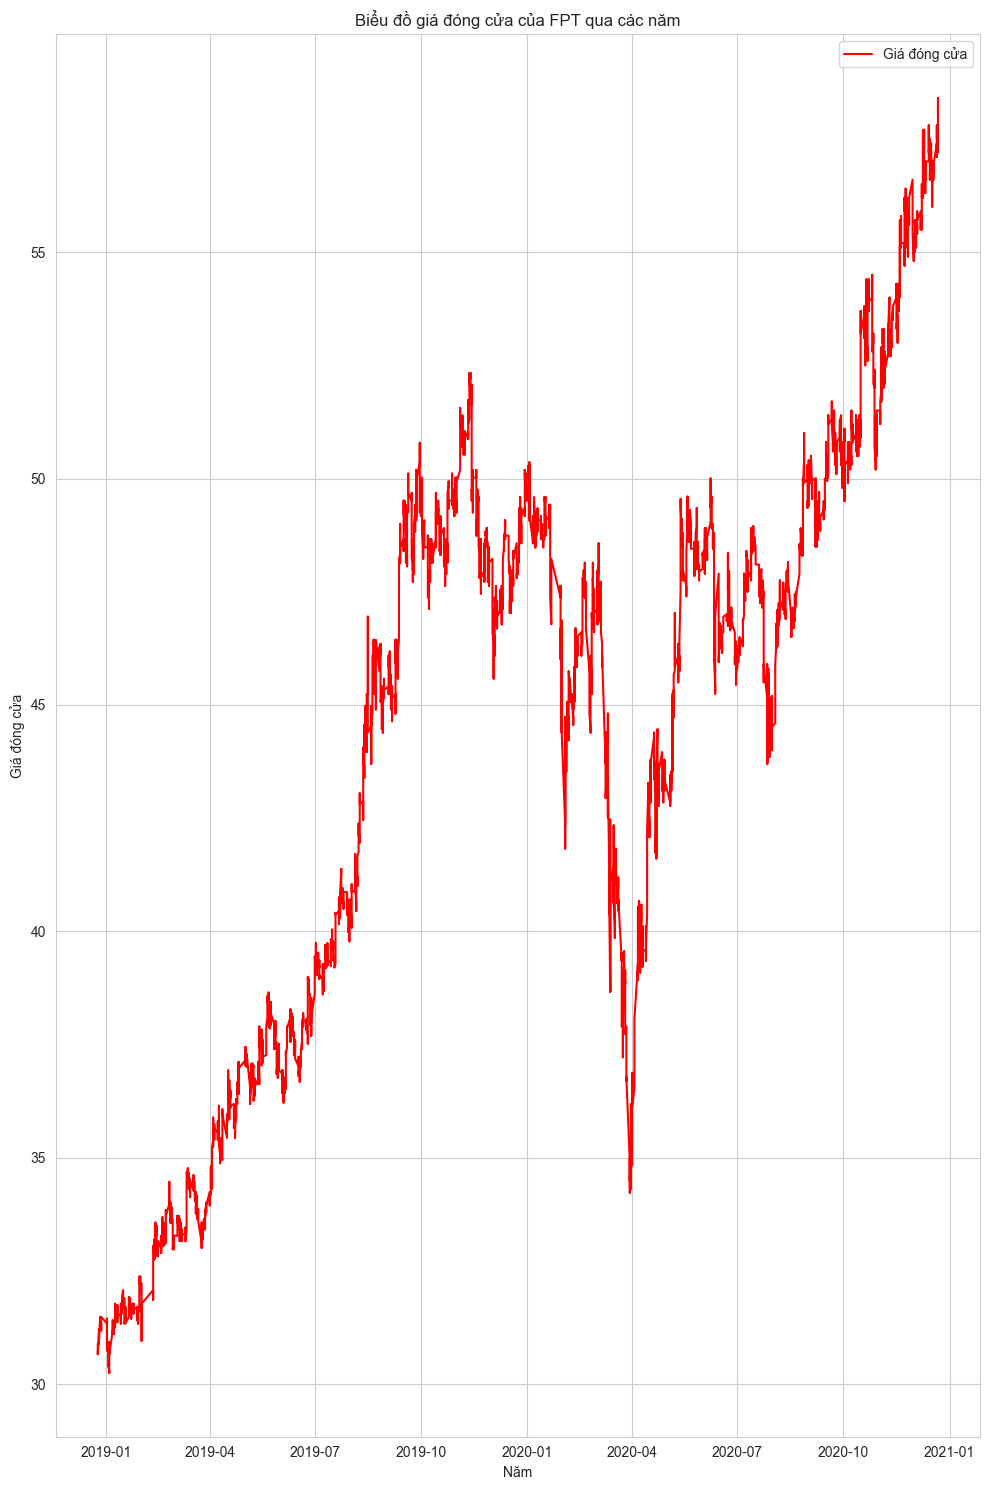

In [815]:

#tạo đồ thị giá đóng cửa qua các năm
plt.figure(figsize=(10,15))
plt.plot(df_FPT['Date'],df_FPT['Close'],label='Giá đóng cửa',color='red')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.title('Biểu đồ giá đóng cửa của FPT qua các năm')
plt.legend(loc='best')

plt.gca().xaxis.set
plt.tight_layout()
plt.show()

In [898]:
df_FPT.index = df_FPT['Date']
dfClose_FPT = pd.DataFrame(df_FPT[['Close','Time_numeric','month','year','day']])

In [817]:
# #tạo tập dữ liệu riêng cho giá đóng cửa
# dfClose_FPT = pd.DataFrame(index=range(0,len(df_FPT)),columns=['Date', 'Close'])

# for i in range(0,len(df_FPT)):
#     dfClose_FPT['Date'][i]=df_FPT.index[i]
#     dfClose_FPT['Close'][i]=df_FPT['Close'].iloc[i]

In [904]:
dfClose_FPT

,Close,Time_numeric,month,year,day
Date,,,,,
2018-12-25,30.89,33300,12,2018,25
2018-12-25,30.81,33360,12,2018,25
2018-12-25,30.74,33420,12,2018,25
2018-12-25,30.74,33480,12,2018,25
2018-12-25,30.74,33540,12,2018,25
...,...,...,...,...,...
2020-12-22,58.20,51840,12,2020,22
2020-12-22,58.20,51900,12,2020,22
2020-12-22,58.20,51960,12,2020,22


Split dữ liệu

In [843]:
#tạo split tỉ lệ 80/20
split=int(0.8*len(dfClose_FPT))
split

77924

In [844]:
#chia thành train và test set
train, test=dfClose_FPT[:split], dfClose_FPT[split:]

In [845]:
dfClose_FPT.shape, train.shape, test.shape

((97406, 5), (77924, 5), (19482, 5))

Tính chỉ số RMSE
Chúng ta sẽ đánh giá mô hình bằng cách tính toán chỉ số RMSE hoặc Độ lệch gốc-trung bình-bình phương (Root-mean-square deviation), một thước đo tốt để xem xét mức độ chính xác của các mô hình dự đoán phản hồi.

In [846]:
x_train=train.drop('Close',axis=1)
y_train=train['Close']
x_test=test.drop('Close',axis=1)
y_test=test['Close']

In [847]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape
x_train,y_train


(            Time_numeric  month  year  day
 Date                                      
 2018-12-25         33300     12  2018   25
 2018-12-25         33360     12  2018   25
 2018-12-25         33420     12  2018   25
 2018-12-25         33480     12  2018   25
 2018-12-25         33540     12  2018   25
 ...                  ...    ...   ...  ...
 2020-08-14         34080      8  2020   14
 2020-08-14         34140      8  2020   14
 2020-08-14         34200      8  2020   14
 2020-08-14         34260      8  2020   14
 2020-08-14         34320      8  2020   14
 
 [77924 rows x 4 columns],
 Date
 2018-12-25    30.89
 2018-12-25    30.81
 2018-12-25    30.74
 2018-12-25    30.74
 2018-12-25    30.74
               ...  
 2020-08-14    47.95
 2020-08-14    47.95
 2020-08-14    47.95
 2020-08-14    48.00
 2020-08-14    48.00
 Name: Close, Length: 77924, dtype: float64)

In [848]:

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [852]:
preds=model.predict(x_test)
preds

array([50.97927411, 50.97931183, 50.97934956, ..., 57.00048731,
       57.00060048, 57.00124175])

In [850]:
rmse=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rmse

2.2647401867301387

C:\Users\HP\AppData\Local\Temp\ipykernel_36592\2300490861.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = 0
C:\Users\HP\AppData\Local\Temp\ipykernel_36592\2300490861.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = preds


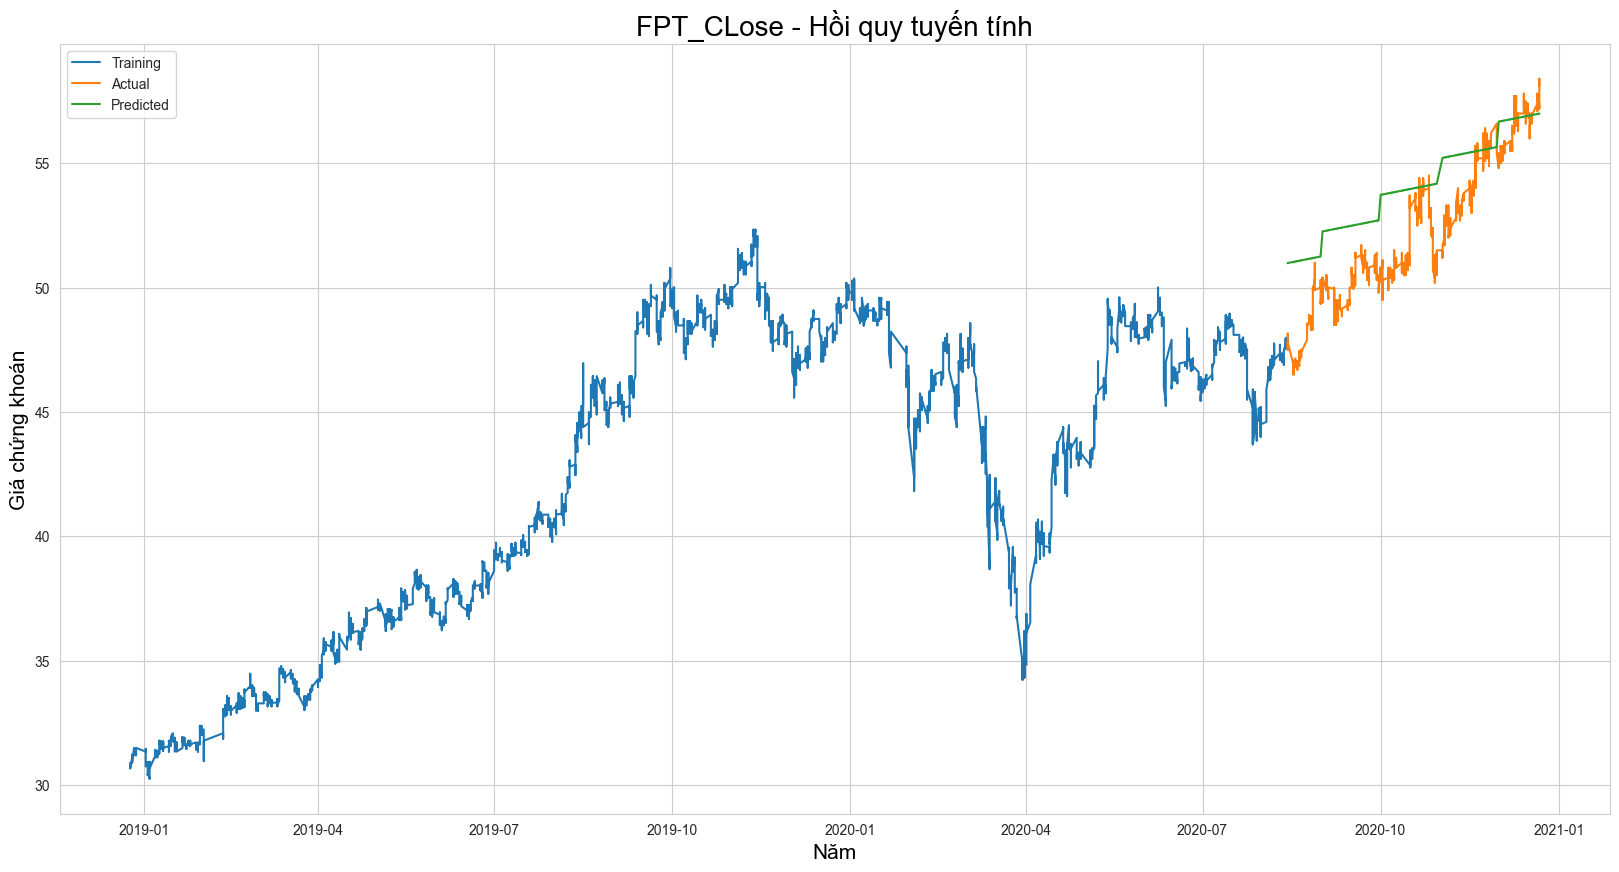

In [853]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
test['Predictions'] = 0
test['Predictions'] = preds

test.index = df_FPT[split:].index
train.index = df_FPT[:split].index

plt.plot(train['Close'], label='Training')
plt.plot(test['Close'], label='Actual')
plt.plot(test['Predictions'], label='Predicted')
plt.title("FPT_CLose - Hồi quy tuyến tính", color = 'black', fontsize = 20)
plt.xlabel('Năm', color = 'black', fontsize = 15)
plt.ylabel('Giá chứng khoán', color = 'black', fontsize = 15)
plt.legend()

LSTM là một Recurrent Neural Network (tạm dịch: Mạng thần kinh tái phát) có thể lưu trữ những thông tin quan trọng trong quá khứ và quên đi những thông tin không quan trọng. Nó sử dụng các quy trình bộ nhớ ngắn hạn để tạo ra bộ nhớ dài hơn và giới thiệu khái niệm về cổng để kiểm soát luồng thông tin trong mạng lưới bằng cách có cơ chế cổng đầu vào, đầu ra và cổng quên.

In [919]:
#chuyển DataFrame thành numpy array
a=dfClose_FPT[['Close']]
a

,Close
Date,
2018-12-25,30.89
2018-12-25,30.81
2018-12-25,30.74
2018-12-25,30.74
2018-12-25,30.74
...,...
2020-12-22,58.20
2020-12-22,58.20
2020-12-22,58.20


In [921]:
#chuyển dataframe thành numpy
dfClose_FPT_arr=a.values
dfClose_FPT_arr.shape

(97406, 1)

Split data thành train và test set

In [922]:
split=int(0.8*len(dfClose_FPT_arr))
split

77924

In [923]:
train, test=dfClose_FPT_arr[:split], dfClose_FPT_arr[split:]
train.shape,test.shape

((77924, 1), (19482, 1))

In [924]:
train.shape, test.shape

((77924, 1), (19482, 1))

Feature scaling (tạm dịch: Scaling trích chọn)
Tiêu chuẩn hoá dữ liệu bằng cách scale dữ liệu thành định dạng từ 0 đến 1 để cải thiện việc học và tính hội tụ của mô hình.

In [925]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dfClose_FPT_arr)

In [926]:
x_train, y_train=[], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])

In [927]:
#chuyển x_train và y_train thành numpy array cho mô hình LSTM
x_train, y_train=np.array(x_train), np.array(y_train)
x_train

array([[0.02273535, 0.01989343, 0.01740675, ..., 0.03055062, 0.03055062,
        0.03055062],
       [0.01989343, 0.01740675, 0.01740675, ..., 0.03055062, 0.03055062,
        0.03197158],
       [0.01740675, 0.01740675, 0.01740675, ..., 0.03055062, 0.03197158,
        0.03197158],
       ...,
       [0.62522202, 0.62522202, 0.62522202, ..., 0.62877442, 0.62877442,
        0.62877442],
       [0.62522202, 0.62522202, 0.62344583, ..., 0.62877442, 0.62877442,
        0.62877442],
       [0.62522202, 0.62344583, 0.62344583, ..., 0.62877442, 0.62877442,
        0.63055062]])

In [928]:
#chuyển dạng dữ liệu thành 3D theo định dạng yêu cầu của LSTM
x_train=np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(77864, 60, 1)

Tạo và train model
Chúng ta sẽ triển khai một mô hình đơn giản bao gồm một lớp ẩn với 50 nơ-ron, hình dạng dữ liệu đầu vào với số bước thời gian (number of time steps) là (60) và số chiều (dimensionality) là (1) và một lớp đầu ra với bước thời gian là 1. Mô hình sẽ được biên dịch bằng Mean Squared Error (MSE) và trình tối ưu hóa ADAM (Adaptive Moment Estimation), sau đó sẽ được fit với training set với một epoch và batch size là một.

In [929]:
#Tạo và fit mạng lSTM
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [930]:
model.compile(loss='mean_absolute_error',optimizer='adam')
model.fit(x_train,y_train,epochs=1, batch_size=1, verbose=2)
#Dự đoán 504 giá trị, sử dụng 60 từ tập data train
inputs=dfClose_FPT_arr[len(dfClose_FPT_arr)-len(test)-60:]
inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

77864/77864 - 5923s - loss: 0.0054 - 5923s/epoch - 76ms/step


In [931]:
x_test=[]
for i in range(60,inputs.shape[0]):
    x_test.append(inputs[i-60:i,0])
#chuyển data thành numpy array
x_test=np.array(x_test)
#chuyển data thành 3D
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
closing_price=model.predict(x_test)
closing_price=scaler.inverse_transform(closing_price)

609/609 [==============================] - 8s 12ms/step


In [940]:
inputs.shape

(19542, 1)

In [932]:
print(x_test.shape)

(19482, 60, 1)


In [934]:
rmse = np.sqrt(np.mean(np.power((test - closing_price),2)))
rmse

0.3067888627775238

C:\Users\HP\AppData\Local\Temp\ipykernel_36592\3763411404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = closing_price


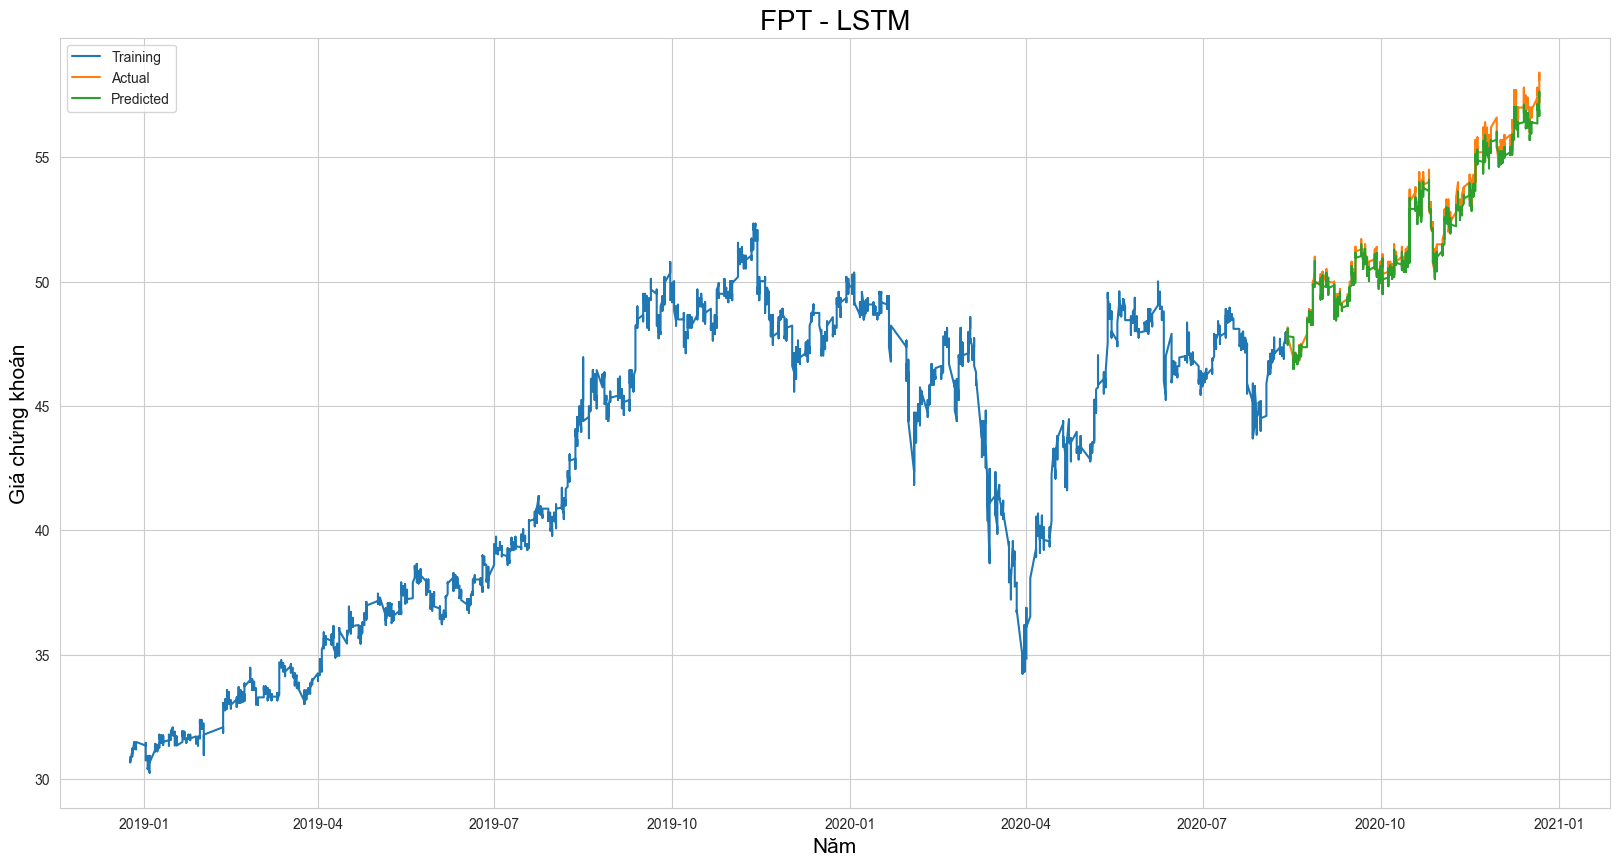

In [938]:
# Plot thông số dự đoán và thực tế
train = dfClose_FPT[:split]
test = dfClose_FPT[split:]
test['Predictions'] = closing_price

plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
plt.plot(train['Close'], label='Training')
plt.plot(test['Close'], label='Actual')
plt.plot(test['Predictions'], label='Predicted')
plt.title("FPT - LSTM", color = 'black', fontsize = 20)
plt.xlabel('Năm', color = 'black', fontsize = 15)
plt.ylabel('Giá chứng khoán', color = 'black', fontsize = 15)
plt.legend()